# Most frequent words using WordCloud
Text data source : Rudyard Kipling, The Jungle Book, https://gutenberg.org/ebooks/236

In [3]:
# must import nltk
import nltk

In [4]:
# Define constants
DATA = 'jungle_book.txt'
ELEPHANT = 'elephant.png'
COLORS = (255, 255, 255)
DPI = 190
RGB = 'RGB'

## Classes

In [5]:
class Token:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f'Token: {self.name}'


    def read_trim_data(self, data, chars, mode='r', enc='utf8'):
        """
        Reads a text file and remove unnecessary characters or words
        which may not be filtered by nltk
        """
        file = open(data, mode, encoding=enc)
        text = file.read()
        if len(chars) > 0:
            for i in range(len(chars)): 
                text = text.replace(chars[i], ' ')
        return text


    def tokenise_text(self, input):
        from nltk.tokenize import word_tokenize
        from nltk.corpus import stopwords
        """
        Tokenises input text and returns a tuple containing
        a list with the word tokens and a long string of the words
        """
        # Apply tokeniser and remove stopwords using nltk
        words = word_tokenize(input.lower())
        words = set(words)
        stop_words = set(stopwords.words('english'))
        
        filtered_words =[]
        for word in words:
            if word not in stop_words:
                filtered_words.append(word)
        # Joins the all filtered words
        joined_string = ' '.join(filtered_words)
        return filtered_words, joined_string
   


class WordImage:
    
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f'Word Image: {self.name}'
    
    def produce_wordcloud_image(self, input, image_file, max=200, cmap='RdBu'):
        import numpy as np
        import matplotlib.pyplot as plt
        from wordcloud import WordCloud
        from PIL import Image
        """
        Makes a overlapping image
        @param input: a continuous text string
        @param max: the number of maximum words to include in the image
        @param cmap: a matplotlib-defined or customised colourmap
        """
        image = Image.open(image_file)
        image_mask = Image.new(mode=RGB,
                              size=image.size,
                              color=COLORS)
        image_mask.paste(image, box=image)
        rgb_arr = np.array(image_mask)
        plt.figure(figsize=(8, 6), dpi=DPI)
        word_cloud = WordCloud(mask=rgb_arr, 
                              background_color='white',
                              max_words=max,
                              colormap=cmap)
        word_cloud.generate(input)
        plt.axis('off')
        plt.imshow(word_cloud, interpolation='bilinear');
    

### Download NLTK packages

In [6]:
# must download 
if nltk.download('punkt') and nltk.download('stopwords'):
    print('Download success!')

Download success!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Process data

In [7]:
token = Token('junglebook')
# characters to remove from the text file
characters = ['\n', '*', '\u2028','\ufeff' ,'\xa0', '\'', 'yes', 'no', 'Mowgli' ]

In [8]:
text = token.read_trim_data(data=DATA, chars=characters)

In [21]:
in_str = token.tokenise_text(input=text)[1]

## Generate a masked wordcloud image

In [10]:
overlayer_image = WordImage('junglebook')

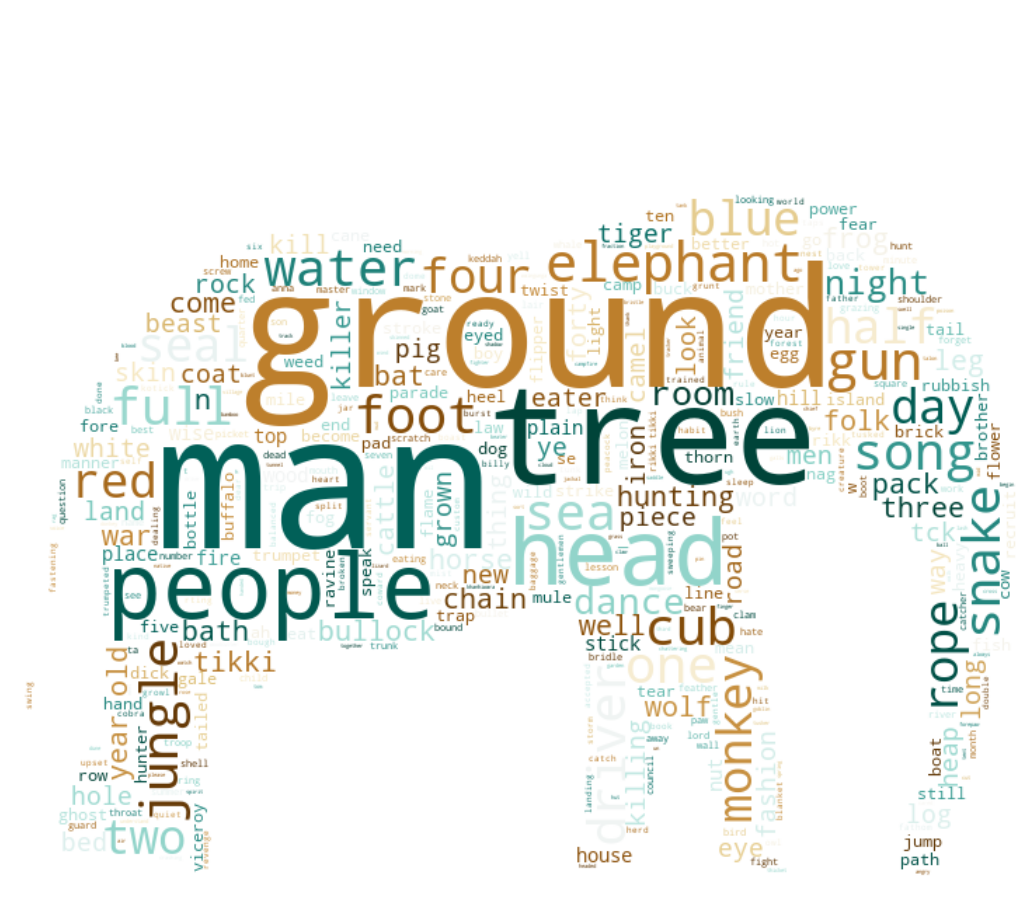

In [20]:
overlayer_image.produce_wordcloud_image(input=in_str, image_file=ELEPHANT, max=400, cmap='BrBG')